## 뇌종양 예측 AI

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
bt_data = pd.read_csv('dataset/brain_tumor_dataset.csv')
#print(bt_data.isnull().sum()) # 결측치 확인
bt_data_column_list = list(bt_data.columns)
#print(len(bt_data_column_list))
XColumns1 = list(bt_data.columns[1:3])
#print(XColumns1)
XColumns2 = list(bt_data.columns[4:14])
#print(XColumns2)
XColumns3 = list(bt_data.columns[15:-1])
#print(XColumns3)
XColumns = XColumns1 + XColumns2 + XColumns3
#print(XColumns)

X = bt_data.drop('Tumor_Type', axis=1).drop('Survival_Rate', axis=1).drop('Follow_Up_Required', axis=1).values  # Survival_Rate(생존율) 열을 제외한 모든 특성
X = X[:,1:] # 첫 컬럼은 데이터 아이디라서 제외
#print(X)
y_TT = bt_data['Tumor_Type'].values  # 타겟 변수 : 종양이 악성인지 양성인지 : 분류모델을 사용해야
#y_SR = bt_data['Survival_Rate'].values  # 타겟 변수 : 생존율이 얼마나 되는지 : 회귀모델을 사용해야
#y_FR = bt_data['Follow_Up_Required'].values  # 타겟 변수 : 후속조치가 필요한지 : 분류모델을 사용해야
#print(y_SR)

gender_List = list(bt_data['Gender'].unique()) # 성별 X[1]
gender_List.sort()
#print(gender_List)
# ['Female', 'Male']
# 분류 모델에서 사용
tumor_Type_List = list(bt_data['Tumor_Type'].unique()) # 뇌종양 유형(양성/악성) y_TT
tumor_Type_List.sort()
#print(tumor_Type_List)
# ['Benign', 'Malignant']
# ['양성', '악성']
location_List = list(bt_data['Location'].unique()) # 종양 위치 X[3]
location_List.sort()
#print(location_List)
# ['Frontal', 'Occipital', 'Parietal', 'Temporal']
# '전두엽', '후두엽', '두정엽', '측두엽'
histology_List = list(bt_data['Histology'].unique()) # 조직학적 유형 X[4]
histology_List.sort()
#print(histology_List)
# ['Astrocytoma', 'Glioblastoma', 'Medulloblastoma', 'Meningioma']
# ['성상세포종', '교모세포종', '수질모세포종', '수막종']
stage_List = list(bt_data['Stage'].unique()) # 병기 X[5]
stage_List.sort()
#print(stage_List)
# ['I', 'II', 'III', 'IV']
symptom_1_List = list(bt_data['Symptom_1'].unique()) # 첫번째증상 X[6]
symptom_1_List.sort()
#print(symptom_1_List)
# ['Headache', 'Nausea', 'Seizures', 'Vision Issues']
# ['두통', '메스꺼움', '발작', '시력 문제']
# 2, 3 도 같음
symptom_2_List = list(bt_data['Symptom_2'].unique()) # 두번째증상 X[7]
symptom_2_List.sort()
#print(symptom_2_List)
symptom_3_List = list(bt_data['Symptom_3'].unique()) # 세번째증상 X[8]
symptom_3_List.sort()
#print(symptom_3_List)
radiation_Treatment_List = list(bt_data['Radiation_Treatment'].unique()) # 방사선 치료 여부 X[9]
radiation_Treatment_List.sort()
#print(radiation_Treatment_List)
# ['No', 'Yes']
surgery_Performed_List = list(bt_data['Surgery_Performed'].unique()) # 수술 여부 X[10]
surgery_Performed_List.sort()
#print(surgery_Performed_List)
# ['No', 'Yes']
chemotherapy_List = list(bt_data['Chemotherapy'].unique()) # 화학요법 치료 여부 X[11]
chemotherapy_List.sort()
#print(chemotherapy_List)
# ['No', 'Yes']
family_History_List = list(bt_data['Family_History'].unique()) # 가족력(가족도 뇌종양을 알았는지) 여부 X[13]
family_History_List.sort()
#print(family_History_List)
# ['No', 'Yes']
mri_Result_List = list(bt_data['MRI_Result'].unique()) # MRI 스캔 결과 여부 X[14]
mri_Result_List.sort()
#print(mri_Result_List)
# ['Negative', 'Positive']
"""
# 다른 분류 모델에서 사용
follow_Up_Required_List = list(bt_data['Follow_Up_Required'].unique()) # 후속조치가 필요한지 여부 y_FR
follow_Up_Required_List.sort()
print(follow_Up_Required_List)
# ['No', 'Yes']
"""

# 문자데이터 숫자로 변환
for x in X:
    for idx,g in enumerate(gender_List):
        if x[1] == g:
            x[1] = idx+1
            
    for idx,l in enumerate(location_List):
        if x[3] == l:
            x[3] = idx+1
            
    for idx,h in enumerate(histology_List):
        if x[4] == h:
            x[4] = idx+1
            
    for idx,s in enumerate(stage_List):
        if x[5] == s:
            x[5] = idx+1
            
    for idx,s1 in enumerate(symptom_1_List):
        if x[6] == s1:
            x[6] = idx+1
            
    for idx,s2 in enumerate(symptom_2_List):
        if x[7] == s2:
            x[7] = idx+1
            
    for idx,s3 in enumerate(symptom_3_List):
        if x[8] == s3:
            x[8] = idx+1
            
    for idx,rt in enumerate(radiation_Treatment_List):
        if x[9] == rt:
            x[9] = idx+1
            
    for idx,sp in enumerate(surgery_Performed_List):
        if x[10] == sp:
            x[10] = idx+1
            
    for idx,c in enumerate(chemotherapy_List):
        if x[11] == c:
            x[11] = idx+1
            
    for idx,fh in enumerate(family_History_List):
        if x[13] == fh:
            x[13] = idx+1
            
    for idx,mr in enumerate(mri_Result_List):
        if x[14] == mr:
            x[14] = idx+1

#print(y_TT)
# 분류 모델 학습시 사용
for idx_y, y in enumerate(y_TT):
    for idx,tt in enumerate(tumor_Type_List):
        if y == tt:
            y = idx+1
    y_TT[idx_y] = y
    
print(y_TT)        
"""
for y in y_FR:
    for idx,fr in enumerate(follow_Up_Required_List):
        if y == fr:
            y = idx+1
    
"""    
###### 초기 학습 (데이터 전처리 전)

# 스케일링 처리
# 데이터 프레임으로 변환
Xdf = pd.DataFrame(X, columns=XColumns)     
#print(Xdf)

# 데이터 전처리: 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xdf)
X_scaled = pd.DataFrame(X_scaled, columns=Xdf.columns)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_TT, test_size=0.2, random_state=42)
"""
lr_model = LinearRegression()
sgdr_model = SGDRegressor(max_iter=200, eta0=1e-4, random_state=42, verbose=1)
# max_iter : 모델 학습 횟수, eta0 : 학습율(1e-4: 0.0001), versbose=1 학습결과출력

# 선형회귀 학습
lr_model.fit(X_train,y_train)
lr_y_pred = lr_model.predict(X_test)

# 선형회귀 평가
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)
print(f'lr_mse : {lr_mse:.2f}')
# lr_mse : 295.05 : 수가 너무 큼 (작을 수록 좋다)
print(f'lr_r2 : {lr_r2:.2f}')
# lr_r2 : -0.00 : 수가 너무 작다 : 1에 가까울 수록 좋고 0에 가까울수록 나쁨

# 경사하강법 학습
sgdr_model.fit(X_train,y_train)
sgdr_y_pred = sgdr_model.predict(X_test)

# 경사하강법 평가
sgdr_mse = mean_squared_error(y_test, sgdr_y_pred)
sgdr_r2 = r2_score(y_test, sgdr_y_pred)
print(f'sgdr_mse : {sgdr_mse:.2f}')
# sgdr_mse : 295.12 : 수가 너무 큼 (0에 가까울수록 좋다)
print(f'sgdr_r2 : {sgdr_r2:.2f}')
# sgdr_r2 : -0.00 : 수가 너무 작다 (1에 가까울 수록 좋고 0에 가까울수록 나쁘다)

####### 데이터를 보고 전처리를 해야한다
####### 스케일링을 하지 말아보고  다시 해보자

"""

# 머신러닝 모델
rf_model = RandomForestRegressor(random_state=42, n_estimators=100) # n_esimators : 모델을 구성하는 결정 틀의 개수수
dtr_model = DecisionTreeRegressor(random_state=42)

# 학습
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

dtr_model.fit(X_train, y_train)
dtr_y_pred = dtr_model.predict(X_test)

# 평가
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"랜덤 포레스트 - MSE: {rf_mse:.2f}, R2: {rf_r2:.2f}")

dtr_mse = mean_squared_error(y_test, dtr_y_pred)
dtr_r2 = r2_score(y_test, dtr_y_pred)
print(f"의사결정나무 - MSE: {dtr_mse:.2f}, R2: {dtr_r2:.2f}")
## 의사결정나무보다는 랜덤포레스트가 정확도가 높다

[2 1 1 ... 1 2 1]
랜덤 포레스트 - MSE: 0.26, R2: -0.03
의사결정나무 - MSE: 0.51, R2: -1.02


'\n# 3. 최적 모델 선택 및 시각화\nresults["Random Forest"] = {"MSE": rf_mse, "R2": rf_r2}\nbest_model = max(results, key=lambda x: results[x][\'R2\'])\nprint("\n최적 모델:", best_model)\n\n# 결과 시각화\nr2_scores = [result["R2"] for result in results.values()]\nmodel_names = list(results.keys())\n\nplt.figure(figsize=(10, 6))\nplt.bar(model_names, r2_scores, color=\'skyblue\')\nplt.xlabel("모델")\nplt.ylabel("R2 Score")\nplt.title("모델별 R2 Score 비교")\nplt.grid(axis=\'y\')\nplt.show()\n'

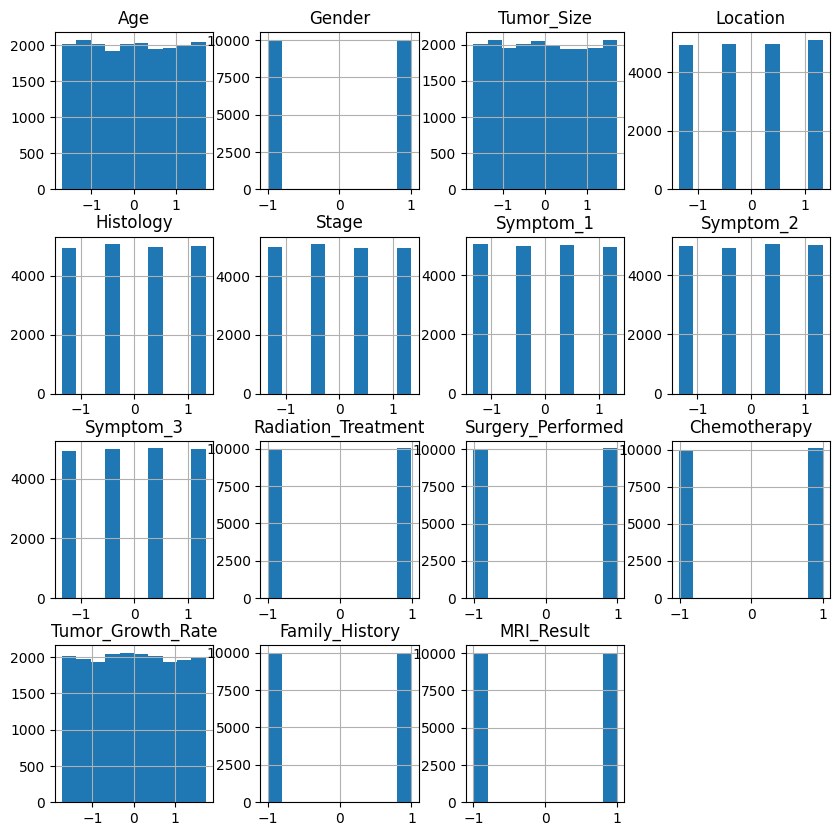

In [18]:
# 각 변수의 분포 확인
#print(Xdf)
y_TT_df = pd.DataFrame(y_TT, columns=["Tumor_Type"])
#print(y_SR_df)
ck_bt_data = pd.concat([X_scaled, y_TT_df], axis=1)
#print(ck_bt_data.head())
ck_bt_data.hist(figsize=(10, 10)) # figsize=(길이, 높이) : 사이즈의 크기를 지정함
plt.show() # 시각화 함수

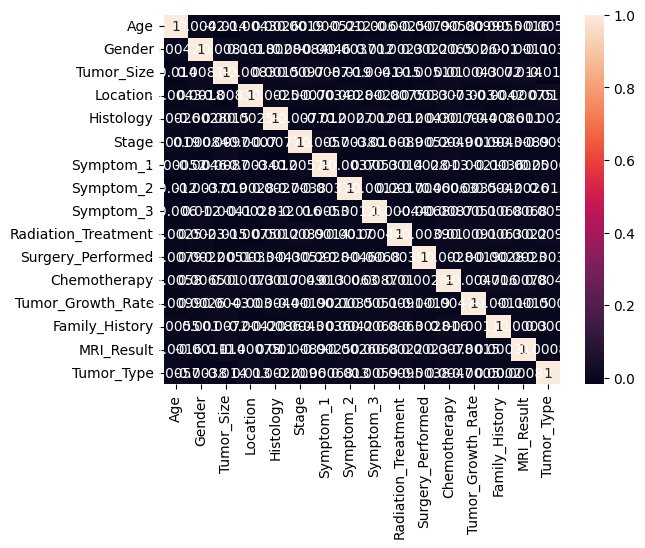

In [19]:
sns.heatmap(ck_bt_data.corr(), annot=True) # annot=True 수치를 출력함. False입력시 숫자 없이 색깔로만 표현
plt.show()
## 생존율을 예측하기 힘들어보임